# 🔍 Problem Statement

The company collects sales data across multiple regions, but lacks clear insights into performance trends, regional strengths, and revenue-driving factors. To make informed strategic decisions, a deeper understanding of the sales patterns is essential.

# 🎯 Goal


📊 Perform in-depth EDA on regional sales data

🌍 Identify high and low performing regions

📈 Uncover trends, anomalies, and revenue influencers

🧠 Provide actionable insights for business decisions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔄 Data Ingestion and initial intro

In [ ]:
df=pd.read_excel(r'Regional Sales Dataset.xlsx',sheet_name=None)

In [3]:
df

{'State Regions':    State Code                 State     Region
 0          AL               Alabama      South
 1          AR              Arkansas      South
 2          AZ               Arizona       West
 3          CA            California       West
 4          CO              Colorado       West
 5          CT           Connecticut  Northeast
 6          DC  District of Columbia      South
 7          DE              Delaware      South
 8          FL               Florida      South
 9          GA               Georgia      South
 10         HI                Hawaii       West
 11         IA                  Iowa    Midwest
 12         ID                 Idaho       West
 13         IL              Illinois    Midwest
 14         IN               Indiana    Midwest
 15         KS                Kansas    Midwest
 16         KY              Kentucky      South
 17         LA             Louisiana      South
 18         MA         Massachusetts  Northeast
 19         MD         

In [4]:
list(df.keys())

['State Regions',
 'Sales Order',
 'Regions',
 'Customers',
 'Products ',
 '2017 Budgets',
 'Pivot Table']

In [5]:
#Assign daatframe to each sheet
df_sales       = df['Sales Order']
df_customers   = df['Customers']
df_products    = df['Products ']
df_regions     = df['Regions']
df_state_reg   = df['State Regions']
df_budgets     = df['2017 Budgets']

In [6]:
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 11)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (48, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


In [7]:

print("\n— df_sales head —")
display(df_sales.head())
print()

print("\n— df_customers head —")
display(df_customers.head())
print()

print("\n— df_products head —")
display(df_products.head())
print()

print("\n— df_regions head —")
display(df_regions.head())
print()

print("\n— df_state_reg head —")
display(df_state_reg.head())
print()

print("\n— df_budgets head —")
display(df_budgets.head())



— df_sales head —


,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Profit
0,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257
1,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782
2,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460
3,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248
4,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930




— df_customers head —


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




— df_products head —


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




— df_regions head —


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




— df_state_reg head —


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West




— df_budgets head —


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [8]:
# Check for missing values in each DataFrame

print("🔍 Missing Values Summary:\n")

print("📦 df_sales:")
print(df_sales.isnull().sum(), "\n")

print("👥 df_customers:")
print(df_customers.isnull().sum(), "\n")

print("🛒 df_products:")
print(df_products.isnull().sum(), "\n")

print("🌍 df_regions:")
print(df_regions.isnull().sum(), "\n")

print("📌 df_state_reg:")
print(df_state_reg.isnull().sum(), "\n")

print("💰 df_budgets:")
print(df_budgets.isnull().sum(), "\n")


🔍 Missing Values Summary:

📦 df_sales:
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
Profit                       0
dtype: int64 

👥 df_customers:
Customer Index    0
Customer Names    0
dtype: int64 

🛒 df_products:
Index           0
Product Name    0
dtype: int64 

🌍 df_regions:
id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64 

📌 df_state_reg:
State Code    0
State         0
Region        0
dtype: int64 

💰 df_budgets:
Product Name    0
2017 Budgets    0
dtype: int64 



# 🛁 Data Cleaning & wrangling

In [9]:
# Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [10]:
df.head()

,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Profit,Customer Index,Customer Names
0,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257,126,Rhynoodle Ltd
1,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782,96,Thoughtmix Ltd
2,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460,8,Amerisourc Corp
3,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248,42,Colgate-Pa Group
4,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930,73,Deseret Group


In [11]:
# Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [12]:
df.head()

,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Profit,Customer Index,Customer Names,Index,Product Name
0,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257,126,Rhynoodle Ltd,27,Product 27
1,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782,96,Thoughtmix Ltd,20,Product 20
2,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460,8,Amerisourc Corp,26,Product 26
3,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248,42,Colgate-Pa Group,7,Product 7
4,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930,73,Deseret Group,8,Product 8


In [13]:

# Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [14]:
df.head()

,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [15]:

# Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)


In [16]:
df.head()

,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [17]:
# Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)


In [18]:
df.head()

,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [19]:
# Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [20]:
df.shape

(64104, 29)

In [21]:
x=pd.read_excel(r'Book1.xlsx')

In [22]:
list(x.keys())

['OrderNumber', 'OrderDate']

In [23]:
df.reset_index(drop=True,inplace=True)
x.reset_index(drop=True,inplace=True)
col_to_add=x[['OrderNumber','OrderDate']]

In [24]:
df=pd.concat([col_to_add,df],axis=1)

In [25]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [26]:
# Convert all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()


df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'profit', 'customer names',
       'product name', 'name', 'county', 'state_code', 'state', 'type',
       'latitude', 'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [27]:
# 4.x — DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)
# ------------------------------------------------------------------

# 1) List only the columns you want to KEEP, now including the broader 'region'
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]

# 2) Rename 
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})


df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [28]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,<NA>
1,2014-01-01,Product 20,25868.7,<NA>
2,2014-01-01,Product 26,5869.2,<NA>
3,2014-01-01,Product 7,16368.1,<NA>
4,2014-01-01,Product 8,18331.2,<NA>
5,2014-01-01,Product 23,57412.3,<NA>
6,2014-01-01,Product 1,20120.1,<NA>
7,2014-01-01,Product 25,10452.0,<NA>
8,2014-01-01,Product 13,19262.5,<NA>
9,2014-01-01,Product 14,34974.0,<NA>


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         15263 non-null  object        
dtypes: datetime64[ns](1

In [30]:
df.isnull().sum()

order_number         0
order_date           0
customer_name        0
channel              0
product_name         0
quantity             0
unit_price           0
revenue              0
cost                 0
state                0
state_name           0
us_region            0
lat                  0
lon                  0
budget           48841
dtype: int64

In [31]:
df['budget']=df['budget'].fillna(df['budget'].mean())

In [32]:
df.isnull().sum()

order_number     0
order_date       0
customer_name    0
channel          0
product_name     0
quantity         0
unit_price       0
revenue          0
cost             0
state            0
state_name       0
us_region        0
lat              0
lon              0
budget           0
dtype: int64

# 🛠 Feature Engineering

In [33]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month


In [34]:
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,2.989305e+06,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2.989305e+06,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,2.989305e+06,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,2.989305e+06,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,2.989305e+06,10082.160,8249.040,45.0,January,1


# 📊 Exploratory Data Analysis

# 🔹1.Monthly Sales Trend Over Time

🎯Goal: Track revenue trends over time to detect seasonality or sales spikes

📈Chart: Line chart

📊EDA Type: Temporal (time series)

🧩Structure: Line with markers to highlight monthly revenue points clearly

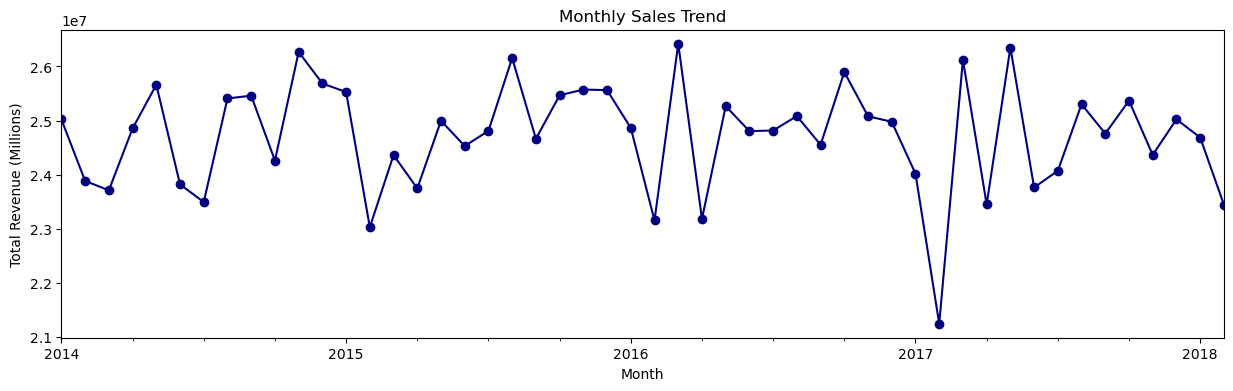

In [35]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

# Plot the monthly sales trend
monthly_sales.plot(marker='o', color='navy')


# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.show()

🧠 Insight:

There are clear seasonal spikes — notably around Q4, suggesting end-of-year promotions or holidays drive sales.

Some dips occur in early quarters (e.g., January–February), indicating possible post-holiday slowdowns.


# 🔹2.Monthly Sales Trend (All Years Combined)

🎯Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

📈Chart: Line chart

📊EDA Type: Temporal (time series)

🧩Structure: Line with markers, months ordered January to December based on month number

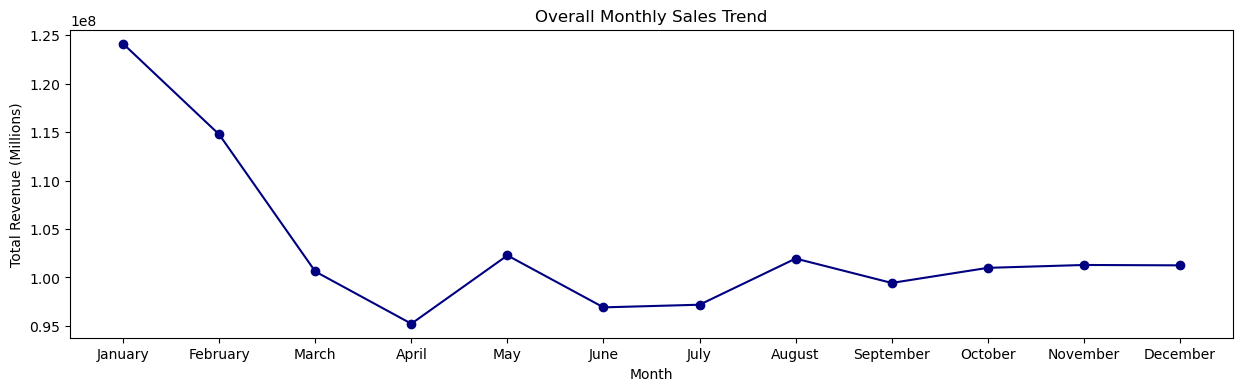

In [36]:
monthly_sales = (
    df.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().sort_index()
)

plt.figure(figsize=(15,4))
plt.plot(
    monthly_sales.index.get_level_values(1),  
    monthly_sales.values,                   
    marker='o',                                
    color='navy'                              
)
plt.title('Overall Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.show()

🧠 Insight:

November and December consistently outperform other months.

Mid-year months (May–July) show comparatively lower activity.

# 🔹3.Top 10 Products by Revenue (in Millions)

🎯Goal: Identify the highest-grossing products to focus marketing and inventory efforts

📊Chart: Horizontal bar chart

📈EDA Type: Univariate

🧩Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

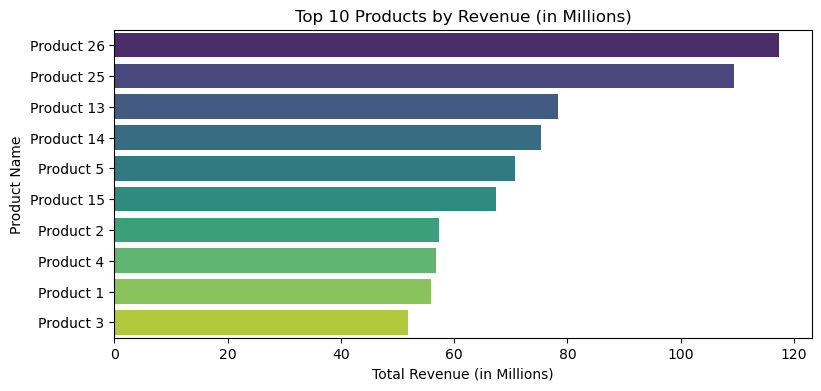

In [37]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)


plt.figure(figsize=(9, 4))


sns.barplot(
    x=top_prod.values,   
    y=top_prod.index,     
    palette='viridis'     
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  
plt.xlabel('Total Revenue (in Millions)')              
plt.ylabel('Product Name')                             

plt.show()

🧠 Insight:

A small number of products account for a large share of revenue (Pareto Principle: ~80/20).

These products should be prioritized for marketing and inventory planning.

# 🔹4.Sales by Channel

🎯Goal: Show distribution of total sales across channels to identify dominant sales routes

📊Chart: Pie chart

📈EDA Type: Univariate

🧩Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted


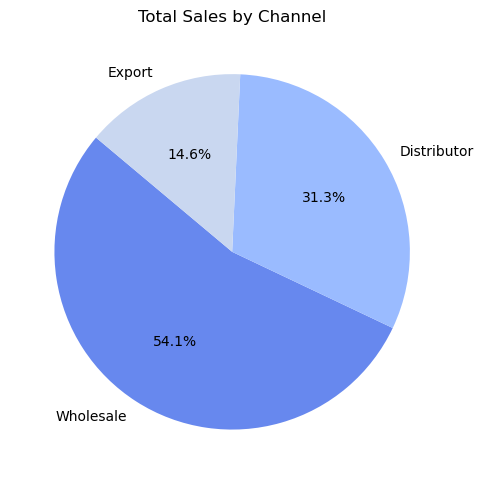

In [38]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()


🧠 Insight:

One or two channels dominate sales.

Channels with lower share may need optimization or de-prioritization.

# 🔹5.Profit Margin % vs. Unit Price

🎯Goal: Examine relationship between unit price and profit margin percentage across orders

📉Chart: Scatter plot

📈EDA Type: Bivariate

🧩Structure: Scatter points with transparency to show data density


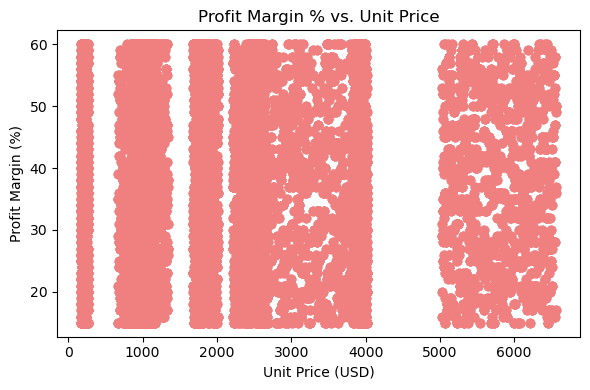

In [39]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

plt.figure(figsize=(6,4))

plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='lightcoral'
)

plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')

plt.tight_layout()
plt.show()


🧠 Insight:

There is no strong linear relationship, but clustering may indicate high-priced items don’t always mean high margins.

Some low-to-mid priced items offer better profit margins.

# 🔹6.Total Sales by US Region

🎯Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

📊chart: Horizontal bar chart

📈EDA Type: Univariate comparison

🧩Structure:  1.Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking 
              2.X‑axis in millions USD, Y‑axis listing regions


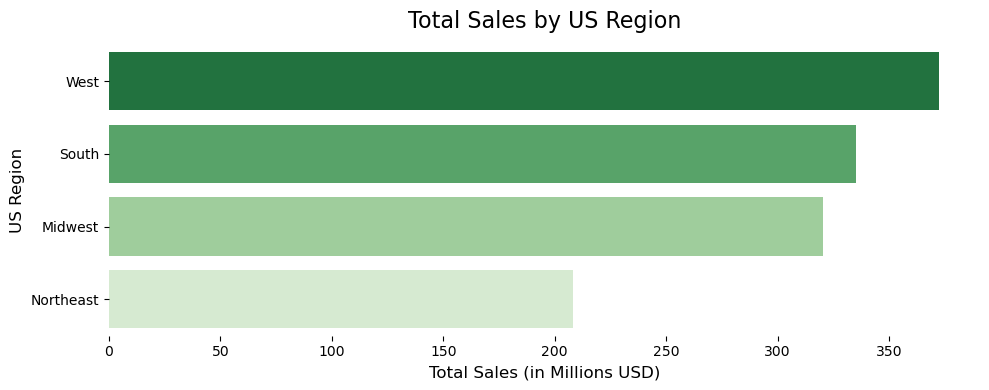

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


🧠 Insight:

Western and Southern regions lead in sales.

Northeast lags, representing potential for growth or reevaluation.


# 🔹7.Average Profit Margin by Channel

🎯Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

📊Chart: Bar chart

📈EDA Type: Bivariate

🧩Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel


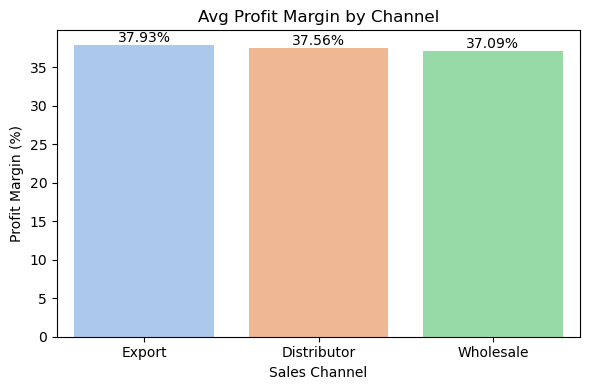

In [41]:
# Average profit margin by sales channel
channel_margin = df.groupby('channel')['profit_margin_pct'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=channel_margin.index, y=channel_margin.values, palette='pastel')
plt.title('Avg Profit Margin by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Profit Margin (%)')


ax.bar_label(ax.containers[0], fmt='%.2f%%')

plt.tight_layout()
plt.show()


🧠 Insight:

Some channels bring higher margins but lower volume.

Optimization may involve balancing channel mix between margin and scale.

# 🔹8.Top 10 Consumers by Revenue

🎯Goal: Identify highest revenue-generating consumers

📊Chart: Bar plot

📈EDA Type: Univariate

🧩Structure: Vertical bars showing top 10 consumers by revenue (in millions), sorted in descending order


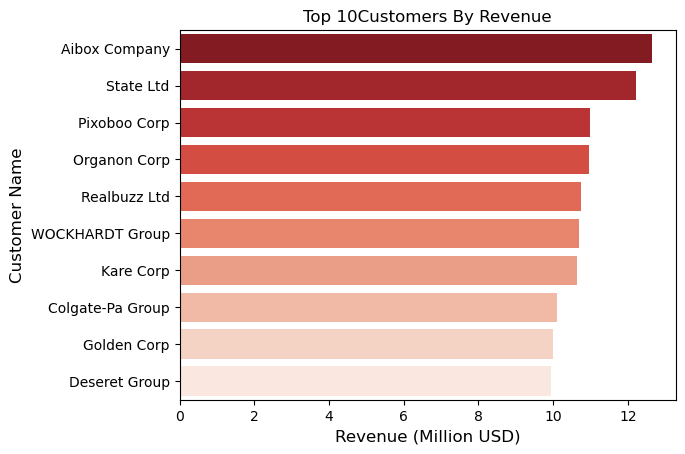

In [42]:
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Reds_r',         # Color palette (reversed blues)
)
plt.title('Top 10Customers By Revenue')
plt.xlabel('Revenue (Million USD)', fontsize=12)              
plt.ylabel('Customer Name', fontsize=12)    

plt.show()

🧠 Insight:

Top consumers are significantly more valuable.

These customers may benefit from targeted loyalty or retention programs.


# 🧾 Final Key Insights

📅 Strong seasonality: Sales spike in Q4 across all years (especially November–December).

🎯 Top products and consumers: A small group drives the majority of revenue — classic 80/20 rule.

🌎 Regional concentration: The Western region leads in performance; Northeast lags behind.

🔄 Channel trade-offs: Some sales channels offer higher profit margins, while others bring more volume.

💵 Price ≠ Profit: High-priced items don’t always result in high profit — margin-focused strategies needed.

# ✅ Recommendations

🚀 Boost Q4 Preparation
Increase inventory and launch targeted campaigns ahead of November–December to maximize seasonal gains.

🏆 Focus on Top Products & Customers
Allocate more marketing budget and personalized engagement for top 10 SKUs and customers.

📉 Optimize or Exit Weak Channels/Regions
Reassess low-performing sales channels and regions — improve efficiency or shift focus elsewhere.

⚖️ Balance Profit vs Volume
Develop a strategy that uses high-margin channels for profitability and high-volume channels for growth.

📊 Enable Data-Driven Personalization
Use insights to fuel recommendation systems, CRM automation, and targeted promotions.



# 🧠 Conclusion



Your EDA reveals powerful patterns in regional and temporal sales behavior. Seasonality, customer concentration, and varying profitability across channels/regions suggest major optimization opportunities. By acting on these insights, the business can increase profitability, operational efficiency, and customer loyalty — all backed by data.

In [43]:
# Export Final DataFrame to CSV
df.to_csv('sales_data_clean.csv', index=False)